Assignment Info  
1. Semester: Spring 2021  
2. Title: Programming Assignment  
3. Due: 04/20/2021  
4. Professor: Dr. Arslan  
5. Author: Chiho Kim  

---
System info

In [1]:
import sys
print(sys.version)

3.8.5 (tags/v3.8.5:580fbb0, Jul 20 2020, 15:57:54) [MSC v.1924 64 bit (AMD64)]


---
Question

Consider the following function that defines Fib(n) for all n >= 1:  
Fib(1) = 1; Fib(2) = 1; and for all n >2, Fib(n) = Fib(n-2) + Fib(n-1)

---
Do the following:


1) Write a divide and conquer (recursive) algorithm RFib(n) that calculates Fib(n) for any given n>=1. Your algorithm also prints out how many additions (+ operation) it performs in calculating Fib(n)

In [106]:
#Basic, simple version
add_r = 0 #Recurrence addition counter

def RFib(n):
    global add_r
    if n == 1 or n == 2:
        return 1
    add_r += 1 #addition counter
    return RFib(n-2) + RFib(n-1)

In [166]:
add_d = 0
mem = list()

def DFib(n):
    global add_d
    global mem
    tmp = list()
    if n >=1:
        tmp.append(1)
    if n >=2:
        tmp.append(1)
    if n >=3:
        for i in range(2, n): #mem[2]: DFib(3), mem[n-1]: DFib(n). from i=2 to i=n-1
            tmp.insert(i, tmp[i-2]+tmp[i-1])
            add_d += 1
    mem = tmp
    return tmp[n-1]

In [211]:
def showComparison(n):
    global add_r
    global add_d
    val = DFib(n)
    RFib(n)
    print(f'When n is {n}, Fib(n) is '+ str(val))
    print(f'Additions in RFib(n) is {add_r}. On the other hand, those in DFib(n) is {add_d}.')
    reset()

def reset():
    global add_r
    global add_d
    global mem
    add_r = 0
    add_d = 0
    mem = []

In [212]:
#Comparison
reset()
n = 25
showComparison(n)

When n is 25, Fib(n) is 75025
Additions in RFib(n) is 75024. On the other hand, those in DFib(n) is 23.


In [213]:
#Table
reset()
add_r_list=list()
add_d_list=list()
n_list=[5, 10, 15, 20, 25, 30]
for n in n_list:
    RFib(n)
    DFib(n)
    add_r_list.append(add_r)
    add_d_list.append(add_d)
    reset()
print('n\t', end='')
for n in n_list:
    print(n, end='\t')
print('\nRFid(n)\t', end='')
for i in range(len(n_list)):
    print(add_r_list[i], end='\t')
print('\nDFid(n)\t', end='')
for i in range(len(n_list)):
    print(add_d_list[i], end='\t')

n	5	10	15	20	25	30	
RFid(n)	4	54	609	6764	75024	832039	
DFid(n)	3	8	13	18	23	28	

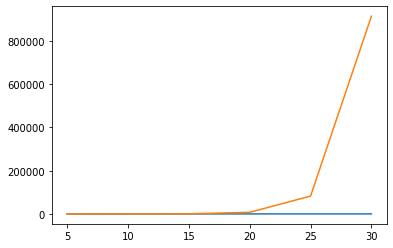

In [202]:
import matplotlib.pyplot as plt

plt.plot(n_list, add_d_list)
plt.plot(n_list, add_r_list)